## Método del trapecio para integrales dobles.

Al igual que el inciso anterior, este método aproxima el valor de las integrales a partir de la suma finita de valores genrados bajo el área de un trapecio, con la diferencia que en este caso se suman volumenes generados a partir de una porcion de área reflejada por la curva en $R^3$, formando prismas trapezoidales. 

### Método numérico.

En este caso se hará uso de dos pasos, $k$ y $h$, los cuales se encargarán de generar una cuadrícula delimitada por $[c(x),d(x)]$ en el eje de las $y$, y $[a,b]$ en el eje de las $x$. Para ello se utilizarán cantidades de particiones finitas ambos ejes: $"m"$ para el eje $"y"$, y $"n"$ para el eje $"x"$. Los distintos pasos quedan definidos por:

$$h = \frac{b-a}{n};\;\; k(x) = \frac{d(x)-c(x)}{m}$$

Cabe resaltar que a pesar que $k$ puede tomar un valores reales cuando los limites están delimitados por valores reales, este puede tomar valores en funcion de una variable dependiente, esto gracias a tener la posibilidad de aplicar limites variables en este; por ello se notará como $k(x)$.

<img src="images/integrales_dobles_trapecio.gif" alt="Imagen" style = "width:40%;">

Para el cálculo del valor numérico de la integral deberemos, de forma recursiva, realizar el método del trapecio simple a ambas variables, primero con respecto a $"y"$, y luego con respecto a $"x"$.

Se aplica la fórmula del inciso anterior a la variable $"y"$ en los límites $[c(x),d(x)]$, haciendo uso de un paso $k(x)$ y una cantidad de particiones $"m"$, generando una expresión que dependa únicamente del valor de $"x"$. Esto se realiza de la siguiente forma:


$$\int_{c(x)}^{d(x)} {f(x,y)}\;dy = \sum_{j=1}^{m} {\left[k(x)\cdot\left(\frac{f(x,c(x)+(j-1)\cdot k(x))+f(x,c(x)+j\cdot k(x))}{2}\right)\right]} = g(x)$$


La función $g(x)$ generada a partir de este proceso es la que posteriormente integraremos con respecto a $"x"$ en los límites $[a,b]$ con un paso $"h"$ y una cantidad de particiones $"n"$. El valor que se obtenga, corresponderá al valor final de la integral doble.

$$\int_{a}^{b} {g(x)}\;dx = \sum_{j=1}^{n} {\left[h\cdot\left(\frac{g(a+(j-1)\cdot h)+g(a+j\cdot h)}{2}\right)\right]} = I*$$

### Manual de uso del programa.
#### Entradas

El programa recibirá 7 parámetros ingrados por el usuario:

- $f(x,y)$: Recibe una función en formato númerico aceptado por python; está debe de estar en funcion de x ^ y.
- a: El límite inferior con respecto a $x$ de la integral.
- b: El límite superior con respecto a $x$ de la integral.
- c(x): El límite inferior con respecto a $y$ de la integral.
- d(x): El límite superior con respecto a $y$ de la integral.
- n: Cantidad de secciones en el eje $x$ a considerar.
- m: Cantidad de secciones en el eje $y$ a considerar.

#### Salidas
- I: El valor númerico que toma la integral de la función ingresada en el intervalo dado.
- Gráfico del área proyectada por la curva en $R^3$.


In [3]:
from sympy import *
from numpy import *
import ipywidgets as widgets
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
x = Symbol('x')
y = Symbol('y')
init_printing()

f_input = widgets.Text(
    placeholder='Funciona integrar',
    description='Funcion:',
    disabled=False
)

cx_input = widgets.Text(
    description = 'c(x) = ',
    placeholder = 'Limite inferior',
    disabled = False
)

dx_input = widgets.Text(
    description = 'd(x) = ',
    placeholder = 'Limite Superior',
    disabled = False
)

a_input = widgets.FloatText(
    value=0,
    description='a = ',
    disabled=False
)

b_input = widgets.FloatText(
    value=1,
    description='b = ',
    disabled=False
)

n_input = widgets.BoundedIntText(
    min = 1,
    value=2,
    description='n = ',
    disabled=False
)

m_input = widgets.BoundedIntText(
    min = 1,
    value=2,
    description = 'm = ',
    placeholder='Simpson Degree y',
    disabled=False
)

display(f_input)
display(Math('---------------------------------------------------------------'))
display(cx_input, dx_input)
display(Math('---------------------------------------------------------------'))
display(a_input, b_input)
display(Math('---------------------------------------------------------------'))
display(n_input, m_input)

Text(value='', description='Funcion:', placeholder='Funciona integrar')

<IPython.core.display.Math object>

Text(value='', description='c(x) = ', placeholder='Limite inferior')

Text(value='', description='d(x) = ', placeholder='Limite Superior')

<IPython.core.display.Math object>

FloatText(value=0.0, description='a = ')

FloatText(value=1.0, description='b = ')

<IPython.core.display.Math object>

BoundedIntText(value=2, description='n = ', min=1)

BoundedIntText(value=2, description='m = ', min=1)

In [5]:
try:
    nx = n_input.value
    mx = n_input.value

    fxy = sympify(f_input.value)

    cx = sympify(cx_input.value)
    dx = sympify(dx_input.value)

    a = a_input.value
    b = b_input.value

    k = (dx - cx)/(mx)

    h = (b-a)/(nx)
except:
    print("\033[1;31;48m Error de ingreso.")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

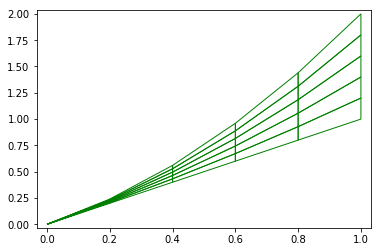

In [9]:
gx = 0

for i in range(1, mx+1):
    gx = gx + (k/2)*(fxy.subs(y,cx+(i-1)*k) + fxy.subs(y,cx+(i)*k))

I = 0

for i in range(1,nx+1):
    I = I + (h/2)*(gx.subs(x,a+(i-1)*h) + gx.subs(x,a+(i)*h))

display(Math("I* = \int_{"+latex(a)+"}^{"+latex(b)+"}\int_{"+latex(cx)+"}^{"+latex(dx)+"} ("+latex(fxy)+")\; dy\; dx = "+latex(I)))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

lista = []

dfx =cx 

for i in range(0, (nx)+1):
    lista.append(dfx.subs(x, a +i*h ))

for i in range(0,(nx)):
    for w in range(0,(mx)):
        points = [[a + i*h, dfx.subs(x,a + i*h) + w*k.subs(x,a + i*h)], [a + (i+1)*h, dfx.subs(x,a + (i+1)*h) + w*k.subs(x,a + (i+1)*h)], [a + (i+1)*h, dfx.subs(x,a + (i+1)*h) + (w+1)*k.subs(x,a + (i+1)*h)], [a + i*h, dfx.subs(x,a + i*h) + (w+1)*k.subs(x,a + i*h)], [a + i*h, dfx.subs(x,a + i*h) + w*k.subs(x,a + i*h)] ] #the points to trace the edges.

        polygon= plt.Polygon(points,  fill=None, edgecolor='g')

        ax2.add_patch(polygon)

max_var = max(lista)
min_var = min(lista)

eps = (b-a)/30

if min_var >= 0:
    min_var = 0
    
axes = plt.gca()
axes.set_xlim([a-eps,b+eps])
display(Math("Superficie \;xy"))
axes.set_ylim([float(min_var)-eps,float(max_var)+eps])
plt.show()